In [1]:
import sys
import sqlite3
import time
import ssl
import urllib
from urlparse import urljoin
from urlparse import urlparse
import re
from datetime import datetime, timedelta
import string
import zlib
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from bs4 import BeautifulSoup
import nltk
import scipy.sparse as sp
import pandas as pd
from collections import OrderedDict
from datetime import date
from SentimentAnalyzer import SentimentAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweet = list()
location = list()
twDate = list()
time = list()
lan = ('en',)

# Open the raw data retrieved from the network
conn = sqlite3.connect('starwarsL4.sqlite')
conn.text_factory = str
cur1 = conn.cursor()
for row in cur1.execute('SELECT * FROM Tweets WHERE language =?', lan):
    twee = row[1]
    tweet.append(twee)
    
    loc = row[4]
    location.append(loc)
    
    twD = row[5]
    twDate.append(twD)
    
conn = sqlite3.connect('starwarsL5.sqlite')
conn.text_factory = str
cur2 = conn.cursor()
for row1 in cur2.execute('SELECT * FROM Tweets WHERE language =?', lan):
    twee = row[1]
    tweet.append(twee)
    
    loc = row[4]
    location.append(loc)
    
    twD = row[5]
    twDate.append(twD)
    
conn = sqlite3.connect('starwarsL6.sqlite')
conn.text_factory = str
cur3 = conn.cursor()
for row2 in cur3.execute('SELECT * FROM Tweets WHERE language =?', lan):
    twee = row[1]
    tweet.append(twee)
    
    loc = row[4]
    location.append(loc)
    
    twD = row[5]
    twDate.append(twD)
    
conn = sqlite3.connect('starwarsL7.sqlite')
conn.text_factory = str
cur4 = conn.cursor()
for row3 in cur4.execute('SELECT * FROM Tweets WHERE language =?', lan):
    twee = row[1]
    tweet.append(twee)
    
    loc = row[4]
    location.append(loc)
    
    twD = row[5]
    twDate.append(twD)
    
conn = sqlite3.connect('starwarsL8.sqlite')
conn.text_factory = str
cur5 = conn.cursor()
for row4 in cur5.execute('SELECT * FROM Tweets WHERE language =?', lan):
    twee = row[1]
    tweet.append(twee)
    
    loc = row[4]
    location.append(loc)
    
    twD = row[5]
    twDate.append(twD)
    
for td in twDate:
    dateTime = td.split()
    ti = dateTime[3].split(':')
    tim = ti[0]+ti[1]
    time.append(tim)
    
for i in range(len(time)):
    time[i] = int(time[i])
    
print "done", tweet[0], " - ", location[0], " - ", twDate[0], " - ", time[0]

done @TopHatGamingMan yeah she kind of was coked out of her gourd in star wars.  -  Missouri, USA  -  Thu Dec 29 13:33:54 +0000 2016  -  1333


In [3]:
res = SentimentAnalyzer().analyzes(tweet)

In [4]:
CentralDataTW = dict()
CentralDataTW["Tweets"] = tweet
CentralDataTW["Locations"] = location
CentralDataTW["Time&date"] = pd.to_datetime(twDate)
CentralDataTW["Sentiments"] = res
CentralDataTW["Time"] = time

df = pd.DataFrame(CentralDataTW)

In [5]:
df.head()

,Locations,Sentiments,Time,Time&date,Tweets
0,"Missouri, USA",0,1333,2016-12-29 13:33:54,@TopHatGamingMan yeah she kind of was coked ou...
1,The World Is My Home,0,1333,2016-12-29 13:33:55,RT @AlienFaerie: If they have to replace Carri...
2,"Lille, France",0,1333,2016-12-29 13:33:57,RT @MrFilmkritik: End of 2016 mood: Mads Mikke...
3,United States,1,1333,2016-12-29 13:33:58,"J.J Abrams, the latest “Star Wars” director, j..."
4,U2 안오는 곳,0,1334,2016-12-29 13:34:00,RT @TheIndyFilm: Fans think these two Rogue On...


In [6]:
dfgroup = df.groupby(['Time']).count()

In [7]:
plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


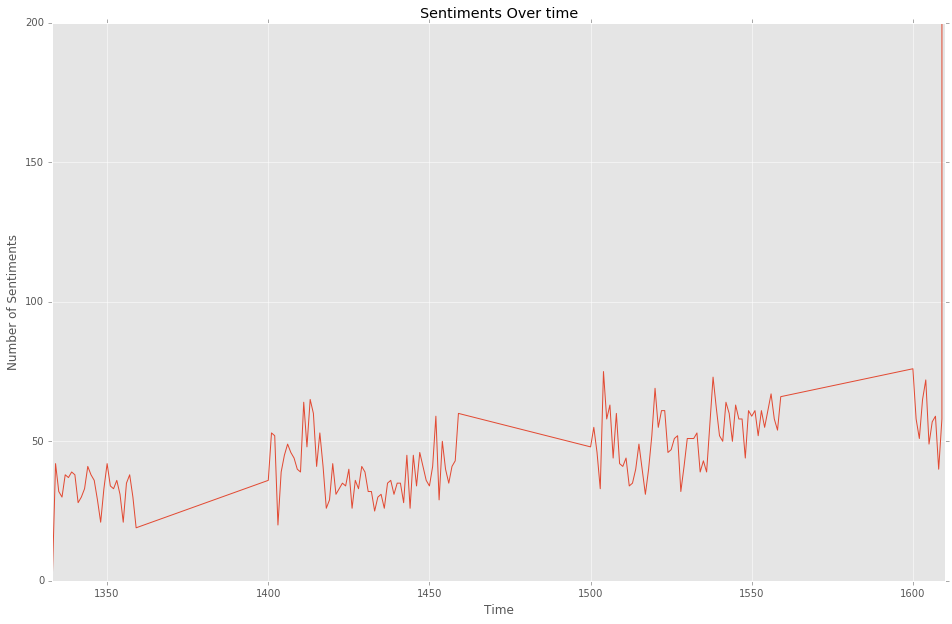

In [27]:
dfgroup['Sentiments'].plot(title="Sentiments Over time",ylim =(0,200))
plt.xlabel("Time")
plt.ylabel("Number of Sentiments")

In [8]:
df['negSent'] = 1 - df['Sentiments']

In [10]:
dfgroup = df.groupby(['Time']).sum()

In [11]:
dfgroup

,Sentiments,negSent
Time,,
1333,1,3
1334,42,31
1335,32,31
1336,30,34
1337,38,20
1338,37,31
1339,39,30
1340,38,32
1341,28,25


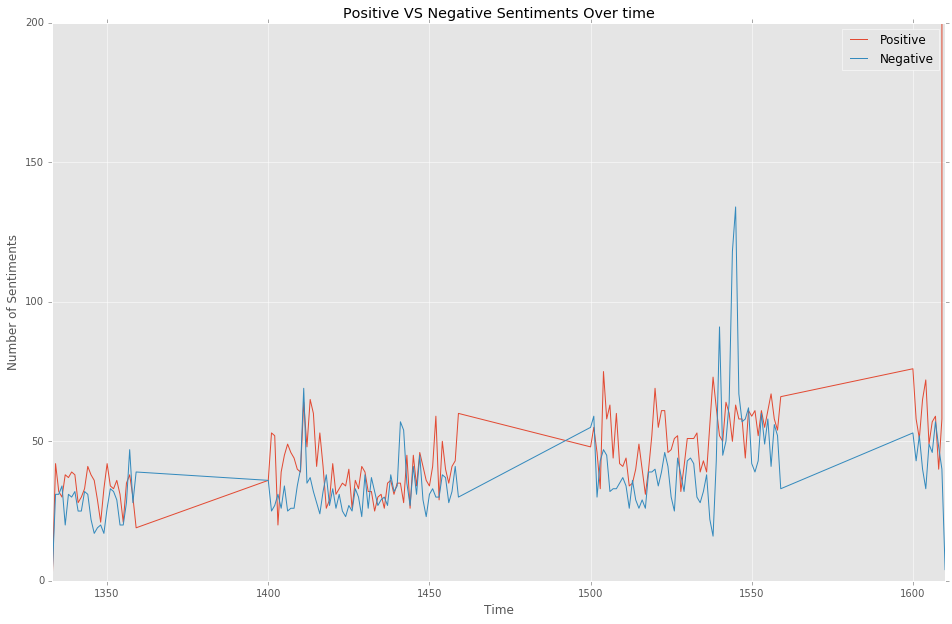

In [28]:
dfgroup.plot(title="Positive VS Negative Sentiments Over time", ylim=(0,200))
plt.xlabel("Time")
plt.ylabel("Number of Sentiments")
plt.legend(["Positive","Negative"])

In [24]:
dfgroup[dfgroup.index > 1605].head()

,Sentiments,negSent
Time,,
1606,57,46
1607,59,57
1608,40,48
1609,58,40
1610,19944,4


In [61]:
df2 = pd.DataFrame()
df2['Positive'] = df['Time']*df['Sentiments']
df2['Negative'] = df['Time']*df['negSent']

In [64]:
df2.head()

,Positive,Negative
0,0,1333
1,0,1333
2,0,1333
3,1333,0
4,0,1334


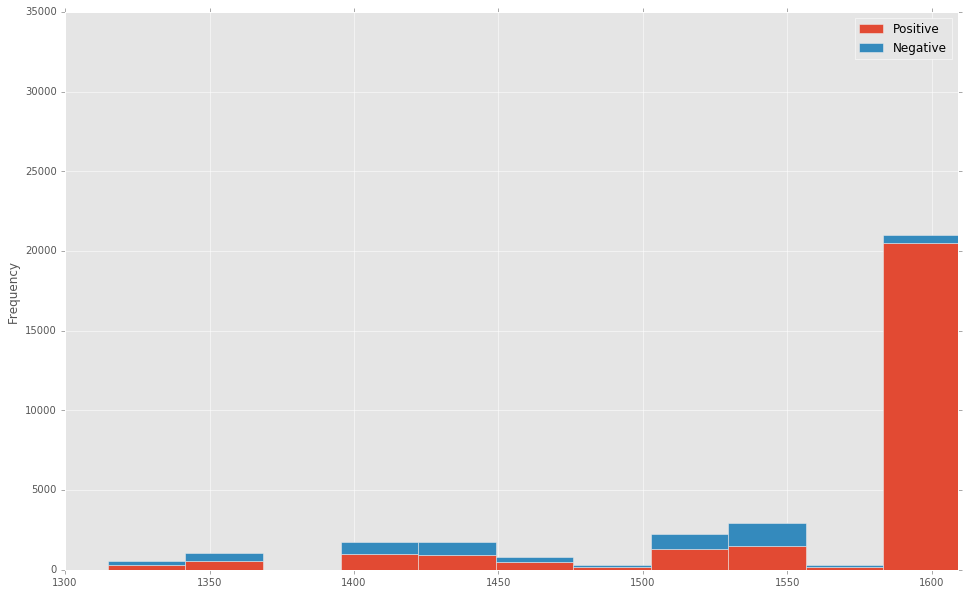

In [68]:
df2.plot.hist(bins=60,stacked=True,xlim=(1300,1609))

In [57]:
dfgroup.index[0]

numpy.int64